In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk03.ipynb")

In [3]:
from IPython.core.display import HTML
from datascience import *

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import os
import networkx as nx
plt.style.use('fivethirtyeight')

%matplotlib inline

In [4]:
!pip install --upgrade networkx==3.1
import networkx as nx
%matplotlib inline

  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3


## Homework 3: Complete Networks

### Opening up a school network

Recall that the Add Health study we explored in Lab 2 sampled schools in many different communities. We looked at the network from one of those communities. Now, we're going to look at *all* of the 84 communities. By looking at many different friendship networks, we can hope to better understand the structure of student friendship networks, since we will be able to use evidence from many different networks, instead of from a single example. At the same time, we will try to better understand the different metrics of network structure and how they relate to each other.

Previously, we had to go through a couple of steps to read a file in and open up a single network. These steps would make a great function, since we will need to go through them each time we want to open 84 different files.

Take a look at this function, which you will use in a moment:

## Question 1: Read in Add Health Networks

Previously, we had to go through a couple of steps to read a file in and open up a single network. These steps would make a great function, since we will need to go through them each time we want to open 84 different files.

Instead, we can write a function to read in all Add Health networks:

In [5]:
def read_add_health_network(network_id):
    """
    network_id : integer from 1 to 84
    
    read in the Add Health network corresponding to the given id number and
    return it as an undirected networkx object
    """

    # this file was downloaded from
    # http://moreno.ss.uci.edu/data.html#adhealth
    edge_file = os.path.join("data", "comm" + str(network_id) + ".dat")
    with open(edge_file, 'r') as f:
        edge_lines = f.readlines()
        
    network = nx.parse_edgelist(edge_lines, nodetype=int, data=[('activity_level', float)])
    
    # note that we call the to_undirected method to ensure we get an undirected network
    return(network.to_undirected())

Now let's use this function to actually read in all 84 of the Add Health school networks:

*This will take a couple of secs*

In [6]:
number_add_health_networks = 84
add_health_networks = [read_add_health_network(network_id) for network_id in range(1, number_add_health_networks + 1)]

In [7]:
grader.check("q1")

q1 results: All test cases passed!

### Calculating network statistics for all of the Add Health communities

Let's start by making a dataset that has the number of nodes in each of the 84 Add Health community networks.

In [8]:
num_nodes = make_array()

for g in add_health_networks:
    num_nodes = np.append(num_nodes, g.number_of_nodes())

add_health_firsttry = Table().with_columns([
     'id', np.arange(1, number_add_health_networks+1),
     'num_nodes', num_nodes,
    ])

add_health_firsttry

id,num_nodes
1,69
2,105
3,32
4,281
5,157
6,108
7,441
8,204
9,248
10,678


## Question 2:

Now, following the pattern above, make a more complete dataset called `add_health` which has columns

* `id`
* `num_nodes`
* `num_edges`
* `avg_degree`
* `num_components`
* `max_possible_num_edges`

In [9]:
num_nodes = make_array()
num_edges = make_array()
avg_degree = make_array()
num_components = make_array()
max_possible_num_edges = make_array()


for g in add_health_networks:
    num_nodes = np.append(num_nodes, g.number_of_nodes())
    num_edges = np.append(num_edges, g.number_of_edges())
    avg_degree = np.append(avg_degree, 2*g.number_of_edges()/g.number_of_nodes())
    num_components = np.append(num_components, nx.number_connected_components(g))
    max_possible_num_edges = np.append(max_possible_num_edges, ((g.number_of_nodes()*(g.number_of_nodes()-1))/2))

add_health = Table().with_columns([
     'id', np.arange(1, number_add_health_networks+1),
     'num_nodes', num_nodes,
     'num_edges', num_edges,
     'avg_degree', avg_degree,
     'num_components', num_components,
     'max_possible_num_edges', max_possible_num_edges
    ])
    

In [10]:
grader.check("q2")

q2 results: All test cases passed!

Let's take a look at the dataset that we just created:

In [11]:
add_health

id,num_nodes,num_edges,avg_degree,num_components,max_possible_num_edges
1,69,220,6.37681,1,2346
2,105,349,6.64762,2,5460
3,32,91,5.6875,1,496
4,281,1136,8.08541,1,39340
5,157,730,9.29936,1,12246
6,108,378,7,1,5778
7,441,1700,7.70975,3,97020
8,204,809,7.93137,1,20706
9,248,1004,8.09677,1,30628
10,678,2795,8.24484,1,229503


<!-- BEGIN QUESTION -->

## Question 3: 

Make four histograms that show the distribution of each column (except for `id` and `max_possible_num_edges`).

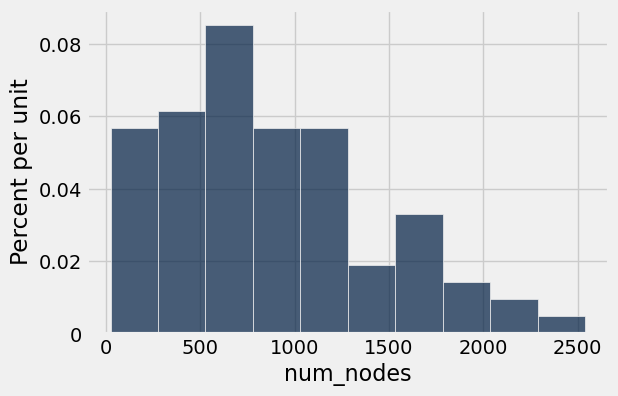

In [12]:
add_health.hist("num_nodes")

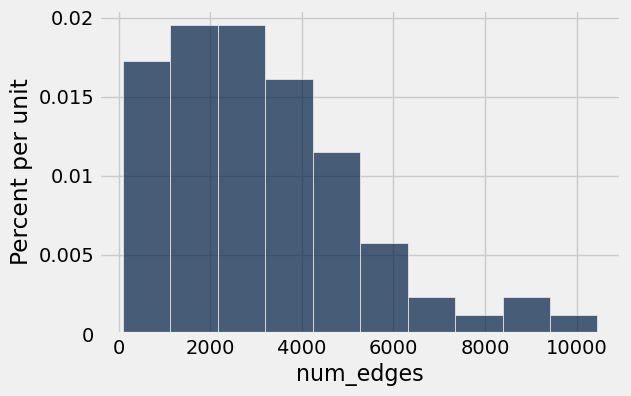

In [13]:
add_health.hist("num_edges")

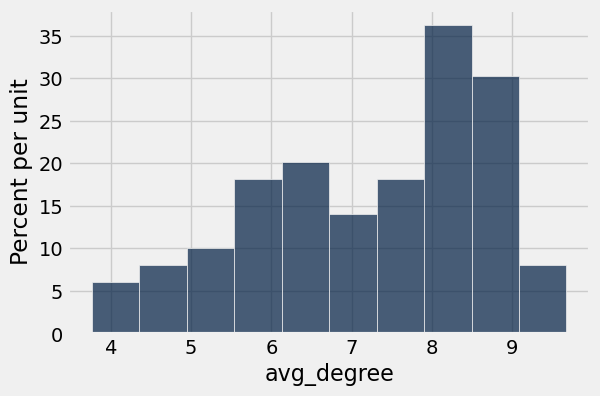

In [14]:
add_health.hist("avg_degree")

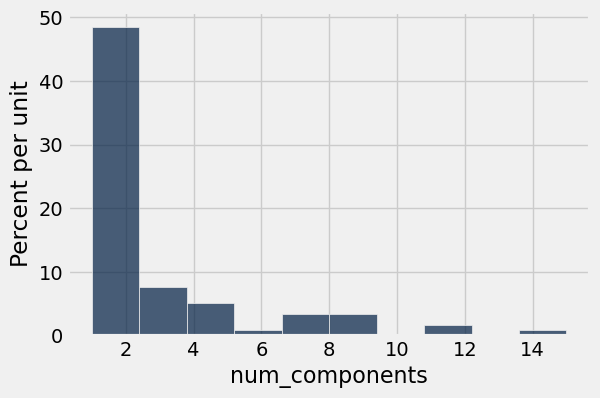

In [15]:
add_health.hist("num_components")

<!-- END QUESTION -->

### Relationship between metrics of network structure

Remember that the goal of these different metrics is to try to find a way to summarize the structure of a network.  It turns out that this is too hard a task to have a single solution: the best way to summarize or describe a network can depend a lot on what you are interested in understanding about the network. For example, one type of summary might tell you about what networks are at high or low risk of quickly spreading an infectious disease and a different type of network metric might tell you about how hierarchical or egalitarian relationships between network members are.

It would be very helpful to understand how these different metrics are related to each other. For example, if two metrics always increase or decrease together, that might tell us that they are capturing the same underlying aspect of network structure. On the other hand, if two metrics are totally unrelated to one another, then that might tell us that each one captures an independent aspect of network structure.

One way to investigate this topic would be to use math to try to derive results that relate the different network metrics to each other. That's a great thing to do (and there has been a lot of work on this topic). But since we're learning how to analyze data, we're going to take a different approach: we're going to use our empirical dataset to see how these metrics behave in a set of real-world friendship networks.

<!-- BEGIN QUESTION -->

## Question 4:

Make scatterplots that investigate the relationship between each of the four metrics in the previous question (for a total of six scatterplots), but before you do so, make a prediction about what you expect to find. For each scatter plot, briefly comment on whether it suggests that your prediction is correct or not. (We're not doing any formal tests here, so this evidence will only be suggestive.)

_I would think that number of nodes and number of edges would be closely connected. I would think the same for number of edges and average degree._

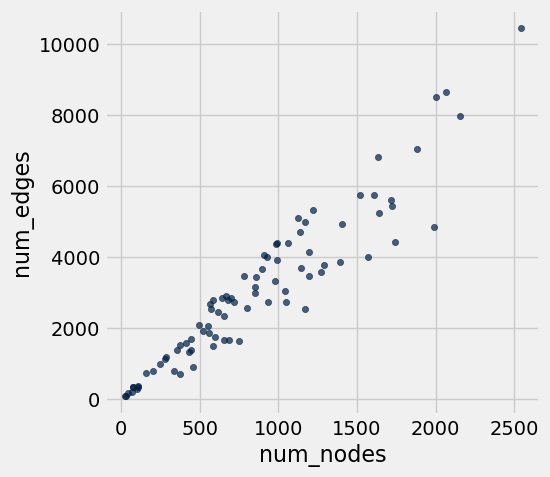

In [16]:
add_health.scatter("num_nodes","num_edges")
# strong correlation between the two

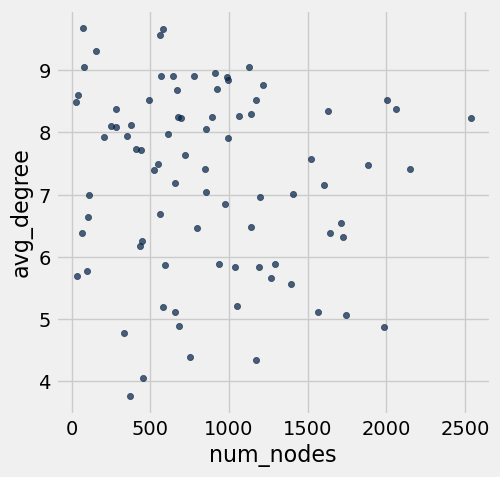

In [17]:
add_health.scatter("num_nodes","avg_degree")
# weak but still noticeable correlation

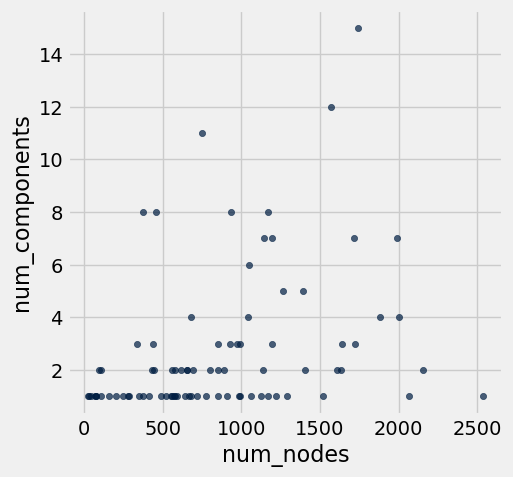

In [18]:
add_health.scatter("num_nodes","num_components")
# nodes doesn't seem to correlate with components much

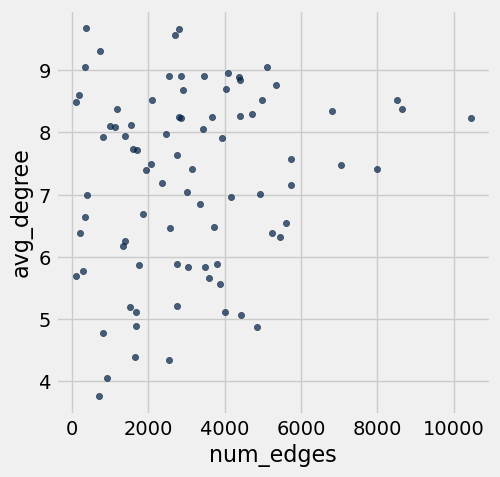

In [19]:
add_health.scatter("num_edges","avg_degree")
# clear correlation between edges and degree

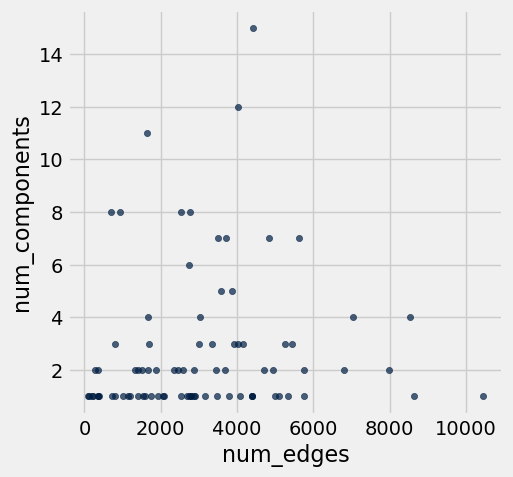

In [20]:
add_health.scatter("num_edges","num_components")
# no apparent correlation

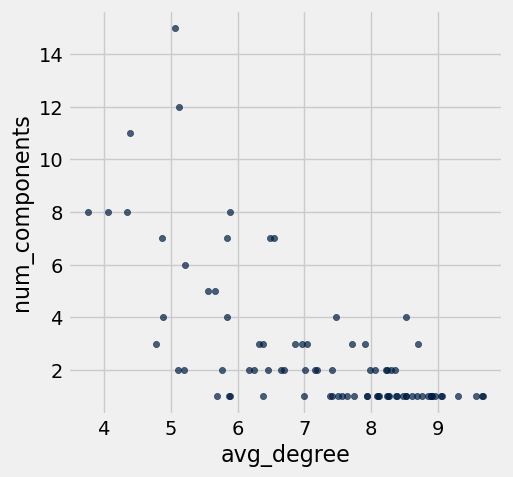

In [21]:
add_health.scatter("avg_degree","num_components")
# higher degree means less components

<!-- END QUESTION -->

## Testing the friendship paradox in one network

We'll start by focusing on one specific network from the Add Health dataset. We'll develop some code using this one network. Later on, we'll generalize our results to all of the networks.

In [22]:
one_network = add_health_networks[0]

Let's make a table that has two columns: one with the id of each node, and another with the degree of each node.

In [23]:
degree_data = Table().with_columns([
    'id', one_network.nodes(),
    'degree', [y for x,y in one_network.degree(one_network.nodes())]
    ])

degree_data

id,degree
1,3
52,7
2,9
20,9
27,8
33,12
45,5
46,8
57,2
59,5


Now let's work on figuring out how to get the average degree of the neighbors of a single node.

In [24]:
one_node = list(one_network.nodes())[0]
one_node

1

This bit of code will show `one_node` and some of the nodes around it:

* `one_node` itself has id 1
* the *neighbors* of `one_node` have ids 36, 37, and 52
* the neighbors of `one_node`'s neighbors (which help you see the degree of each of `one_node`'s neighbors)

NOTE: this code uses some features of the `networkx` library that we aren't going to talk about in this class. So you don't have to understand exactly how it works (though that would be a good challenge if you want one).

In [25]:
#nx.draw(one_network.subgraph(list(nx.single_source_shortest_path_length(one_network, one_node, cutoff=2).keys())),
#        with_labels=True)

The `neighbors()` method will return the set of nodes that are adjacent to `one_node`:

In [26]:
[y for y in one_network.neighbors(one_node)]

[52, 36, 37]

Also, you can get the degree of a specific node using the `degree` method:

In [27]:
one_network.degree(one_node)

3

As we can see from the drawing above, one_node has degree 3.

You can use these facts to help answer the next question.

## Question 5

The code below should calculate the average degree of `one_node`'s neighbors. Fill in the missing parts.



In [28]:
one_node_neighbors = one_network.neighbors(one_node)

# Average degree of one_node's neighbors = (total degree of all one_node's neighbors)/ the number of neighbors

nbr_degree_total = 0 # set up to count the total degree of the neighbors
num_nbrs = 0  # set up to count the number of neighbors

for nbr in one_node_neighbors: # for each neighbor in all of the neighbors of one_node
    nbr_degree_total = nbr_degree_total + one_network.degree(nbr)
    num_nbrs = num_nbrs + 1

result = nbr_degree_total / num_nbrs

print("average degree of neighbors is ", result)

average degree of neighbors is  7.333333333333333


In [29]:
grader.check("q5")

q5 results: All test cases passed!

Now let's generalize the code you just wrote by turning it into a function. This will allow you to easily calculate the average degree of the neighbors of any node you want.

## Question 6 

Fill in the code below to create a function that, given any network `g` and node `node`, will return the average degree of the node's neighbors.


In [30]:
def get_average_degree_of_neighbors(g, node):
    """Given a network and a node, compute the average degree of the node's neighbors.
    
    Parameters
    ----------
    g : networkx Graph object
        The network that node is a member of
    node : networkx node (actually just an integer)
        The node
    
    Returns
    -------
    float
        The average degree of the neighbors of node
    
    """
    
    ## get the nodes that are the neighbors of node
    node_neighbors = one_network.neighbors(node)
    
    nbr_degree_total = 0
    num_nbrs = 0
    
    ## get the degrees of each of those nodes
    for nbr in node_neighbors:
        nbr_degree_total = nbr_degree_total + one_network.degree(nbr)
        num_nbrs = num_nbrs + 1
        
    ## calculate the average
    avg_nbr_degree = nbr_degree_total / num_nbrs    
    
    ## return it
    return(avg_nbr_degree)

In [31]:
grader.check("q6")

q6 results: All test cases passed!

## Question 7 

Now use the function you wrote to calculate the average of the neighbors' degrees for every node in `one_network`.


In [32]:
avg_friends_degree = make_array()

for node in one_network.nodes():
    avg_friends_degree = np.append(avg_friends_degree, get_average_degree_of_neighbors(g, node))

nbr_avg_degrees = Table().with_columns([
    'id', one_network.nodes(),
    'avg_friends_degree', avg_friends_degree
])

nbr_avg_degrees

id,avg_friends_degree
1,7.33333
52,6.57143
2,6.66667
20,7.77778
27,6.625
33,7.08333
45,7
46,8
57,10.5
59,9.4


In [33]:
grader.check("q7")

q7 results: All test cases passed!

## Question 8 

Now you have created a table `degree_data` which has (node id, node degree) and a second table `nbr_avg_degrees` that has (node id, average of friends' degrees). Join these two tables together so that you have a Table with (node id, node degree, average of friends' degrees); call the resulting Table `friend_data`.

Please refer to this tutorial to learn about the "join" function in the datascience module. http://data8.org/datascience/_autosummary/datascience.tables.Table.join.html?highlight=join#datascience.tables.Table.join


In [34]:
friend_data = degree_data.join('id', nbr_avg_degrees, 'id')

friend_data

id,degree,avg_friends_degree
1,3,7.33333
2,9,6.66667
3,4,9.25
5,4,7.75
6,5,5.4
7,7,6.85714
8,10,7.8
9,9,7.33333
10,4,7.25
11,3,6.33333


In [35]:
grader.check("q8")

q8 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Question 9 

Now make a scatter plot that shows at the relationship between the degree of each node (x axis) and the average degree of the node's friends (y axis).


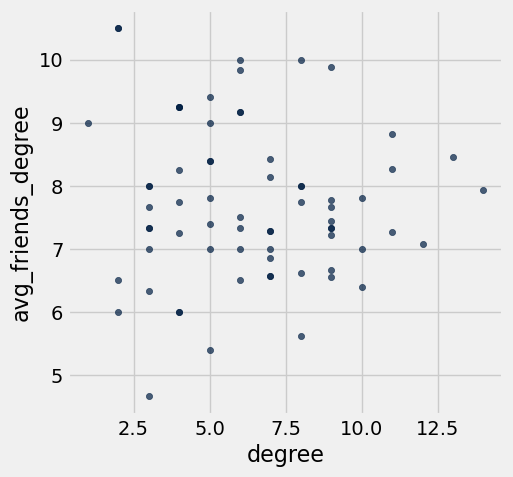

In [36]:
friend_data.scatter("degree", "avg_friends_degree")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 10

Answer both of the follwing questions:

 1) Think about what the friendship paradox predicts about the values in the 'degree' and 'avg_friends_degree' columns of the `friend_data` Table that you just made. Does it say that (i) on average, they should be about the same; (ii) on average, `degree` should be bigger than `avg_friends_degree`; or (iii) on average, `avg_friends_degree` should be bigger than `degree`?

2) Does the plot you just made seem consistent with what would be predicted from the friendship paradox?


_1. It says that (iii) on average, avg_friends_degree should be bigger than degree. <br> 2. Yes, the plot is consistent with what would be predicted from the friendship paradox._

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [37]:
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q5 results: All test cases passed!

q6 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Please upload the .zip file to Gradescope by Tuesday at 2pm.

In [38]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q2 results: All test cases passed!

    q5 results: All test cases passed!

    q6 results: All test cases passed!

    q7 results: All test cases passed!

    q8 results: All test cases passed!
